Link to dataset : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/downloads/video-game-sales-with-ratings.zip/2

# Multivariate Analysis on Video Game Sales
Check and import the required libraries.

In [46]:
import os
import pandas as pd
import numpy as np
import dask.dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

Read the data file.

In [ ]:
os.getcwd()
filename=input('Enter Filename:')
filename =filename + '.csv'

In [35]:
%%time
data1=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

Wall time: 128 ms


In [3]:
print(data.shape)
print(data.dtypes)

(16719, 16)
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [5]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

It is understood that most the columns have null value so it is not advisable to drop columns since we will lose most of the attributes.So it is always to either drop all rows which has NA values or to create a imputation to replace null values.

In [6]:
data=data.dropna()

In [7]:
data.shape

(6825, 16)

In [8]:
colname=data.columns.tolist()
print("Column Names :",colname)

Column Names : ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [9]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [10]:
data.nunique(axis=0)

Name               4377
Platform             17
Year_of_Release      25
Genre                12
Publisher           262
NA_Sales            351
EU_Sales            273
JP_Sales            157
Other_Sales         144
Global_Sales        536
Critic_Score         81
Critic_Count        106
User_Score           89
User_Count          875
Developer          1289
Rating                7
dtype: int64

Since there is no dependent column i.e the variable to be predicted .In this case we can use this dataset to predict global sales feature.<br />
This dataset is used to understand data using visualisations

count    6825.000000
mean        0.777590
std         1.963443
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        82.530000
Name: Global_Sales, dtype: float64
Co-efficeint of variance: 0.3960338170614619


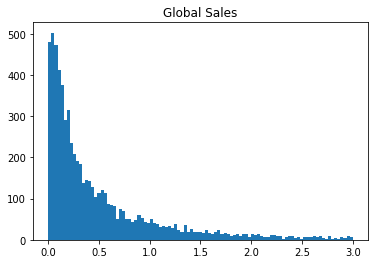

In [11]:
print(data['Global_Sales'].describe())
print("Co-efficeint of variance:",data['Global_Sales'].mean()/data['Global_Sales'].std())
bins = np.linspace(0, 3, 100)
plt.hist(data['Global_Sales'], bins)
plt.title('Global Sales')
plt.show()

From mean and median ,mean <median so the feature must be right skew .Also it is evident from the distribution.
Also the coefficent of variance is .39

Inter Quartile Range: 0.64
Lower Boundary: -0.85
Upper Boundary: 1.71


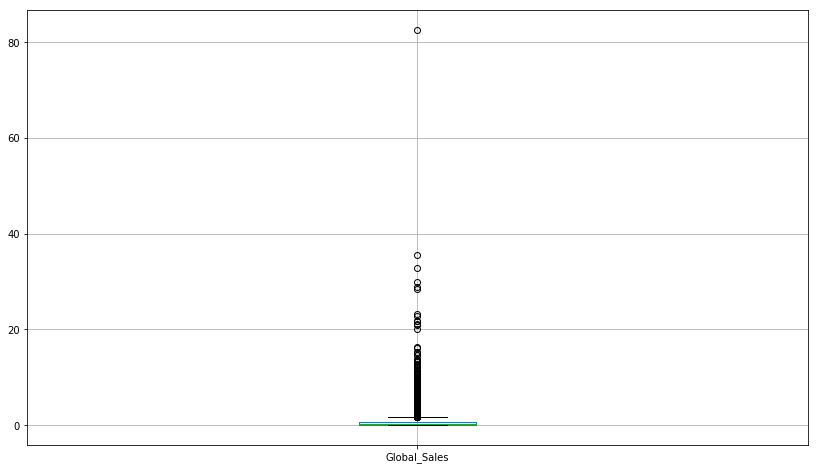

In [12]:
plt.figure(figsize=(14,8))
q1=data['Global_Sales'].quantile(.25)
q3=data['Global_Sales'].quantile(.75)
iqr=q3-q1
print("Inter Quartile Range:",iqr)
print('Lower Boundary:',q1-1.5*(iqr))
print('Upper Boundary:',q3+1.5*(iqr))
data.boxplot(column = ["Global_Sales"])
plt.show()

From the boundaries it should be undestood that the lower boundary is negative ,generally sales cannot be negative.So it is sure that there cannot be outliers belows lower boundary if it is available then it is a anamoly(wrong value)
While all the outliers lie above upper boundary because some of the product may be good enough to reach high sales

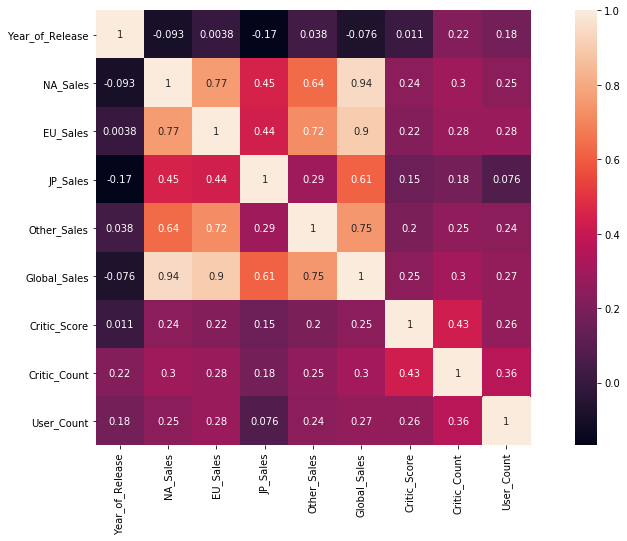

In [36]:
corr =data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True,square=True)
plt.show()

From the correlation map it is understood that global sales cannot be the result variable since it is very highly correlated with other sales,jp sales,eu sales.

Store numerical column and string column in separate columns .

In [14]:
datatype=['int16','int32','int64','float16','float32','float64']
data_num= data.select_dtypes(include=datatype)
data_num.head()
num_col=data_num.columns.tolist()

Try to fix Critical Score has the resultant feature.Most of the times fixing the resultant column will always be fixed based on the business need.

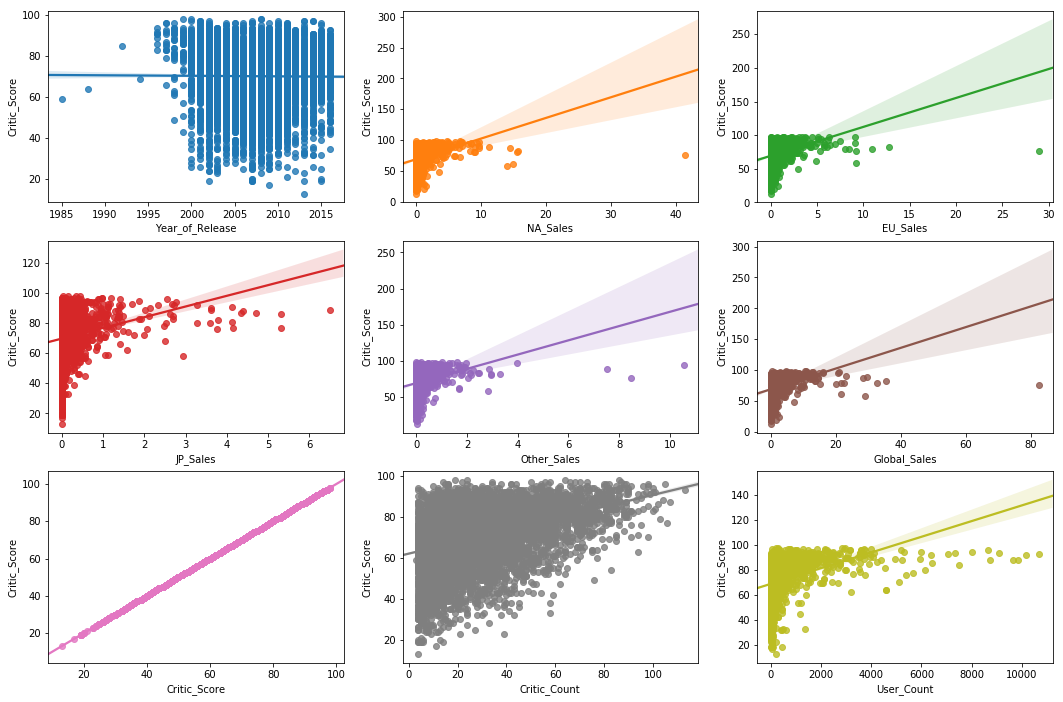

In [15]:
fig, ax = plt.subplots(round(len(num_col) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.regplot(x=num_col[i],y='Critic_Score', data=data_num, ax=ax)
plt.show()

Try to fix Critical Count has the resultant feature.Most of the times fixing the resultant column will always be fixed based on the business need.

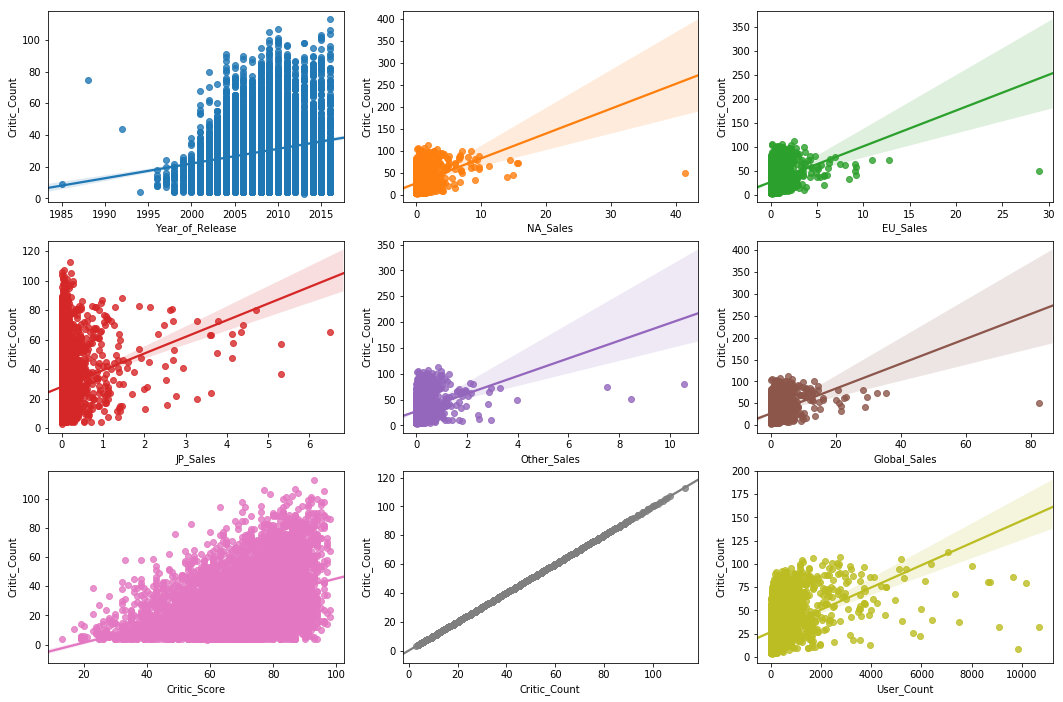

In [16]:
fig, ax = plt.subplots(round(len(num_col) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.regplot(x=num_col[i],y='Critic_Count', data=data_num, ax=ax)
plt.show()

Try to fix User Count has the resultant feature.Most of the times fixing the resultant column will always be fixed based on the business need.

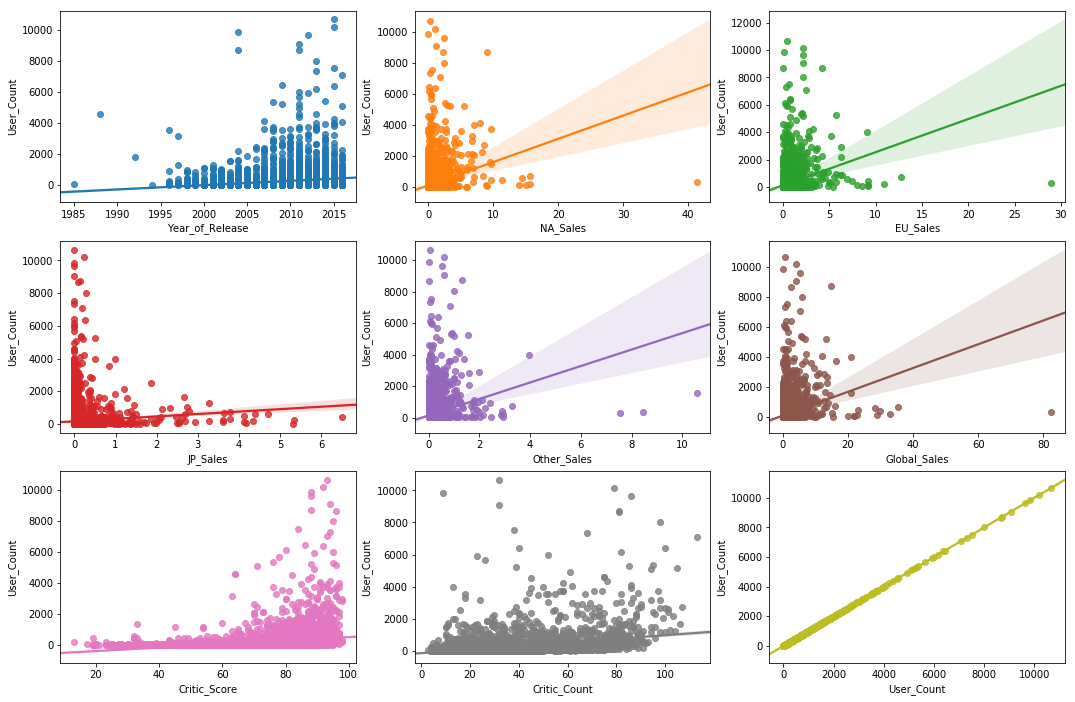

In [50]:
fig, ax = plt.subplots(round(len(num_col) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.regplot(x=num_col[i],y='User_Count', data=data_num, ax=ax)
plt.show()

By observing all the feature ,I wish to fix User_count as the resultant column.It is purely decision of indivdual ,who think to predict any feature.

In [26]:
datatype=['object']
data_obj= data.select_dtypes(include=datatype)
data.head()
print(type(data_obj))
data_obj['User_Count'] = data_num['User_Count']
obj_col=data_obj.columns.tolist()
print(obj_col)

<class 'pandas.core.frame.DataFrame'>
['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating', 'User_Count']


C:\Users\Sam Jones\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


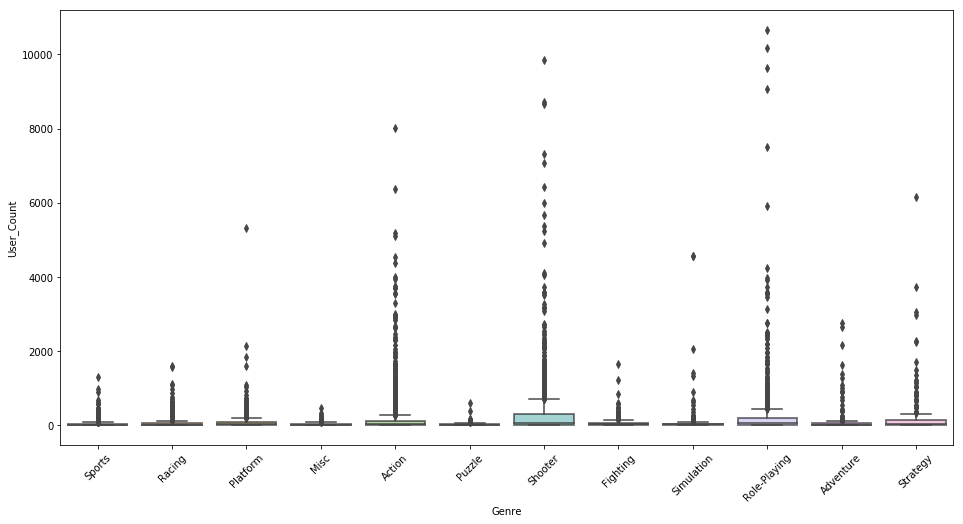

In [18]:
plt.figure(figsize = (16, 8))
ax = sns.boxplot(x='Genre', y='User_Count', data=data_obj)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

From the genre vs user_count ,it is evident that shooter has high user count and all the gener have outliers . <br />
Also puzzle,fighting,miscsports genre has usercount maximum less that 2000. <br />
Few games under Role-playing has user count more than 9000 <br />
From this I can put a point that shooter games has more chance to have more user count.

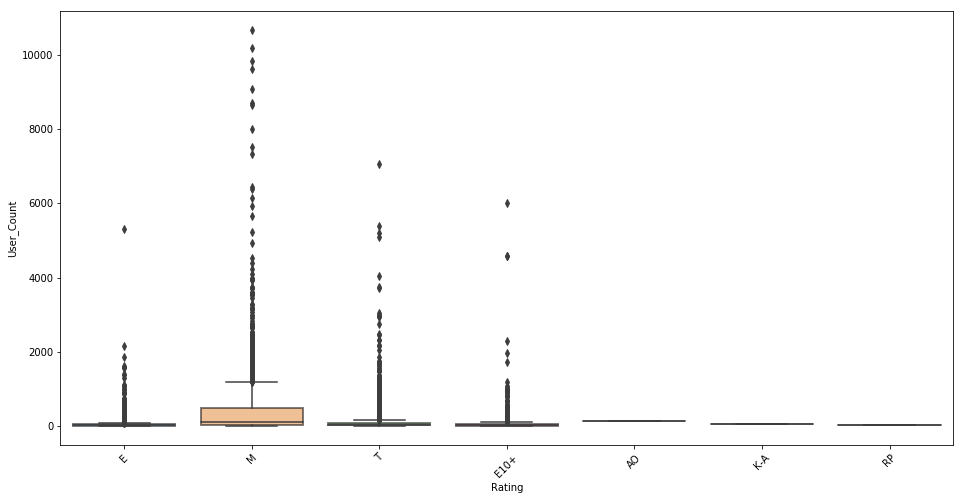

In [19]:
plt.figure(figsize = (16, 8))
ax = sns.boxplot(x='Rating', y='User_Count', data=data_obj)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

It is seen that games with rating category M has more user rating .<br /> If a game is with rating M it has more chance of having high user count that any other rating category.<BR />
Games with category A0,K-A,RP are mostly not prefered by the users.<br />
Games with categoryt E,T,E10+ are less preferred by the users when compared to M.

In [20]:
data_obj['User_Score']=pd.to_numeric(data_obj['User_Score'])
print("Maximum:",data_obj['User_Score'].max())
print("Minimum:",data_obj['User_Score'].min())

Maximum: 9.6
Minimum: 0.5


C:\Users\Sam Jones\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_obj.loc[data_obj['User_Score'] < 2, 'sc_cat'] = "below 2"
data_obj.loc[(data_obj['User_Score'] < 5 ) & (data_obj['User_Score'] > 1.9) , 'sc_cat'] = "2 - 5"
data_obj.loc[(data_obj['User_Score'] < 7.5 ) &  (data_obj['User_Score'] > 4.9 ), 'sc_cat'] = " 5 - 7.5"
data_obj.loc[data_obj['User_Score'] > 7.5, 'sc_cat'] = "above 7.5"

C:\Users\Sam Jones\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sam Jones\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


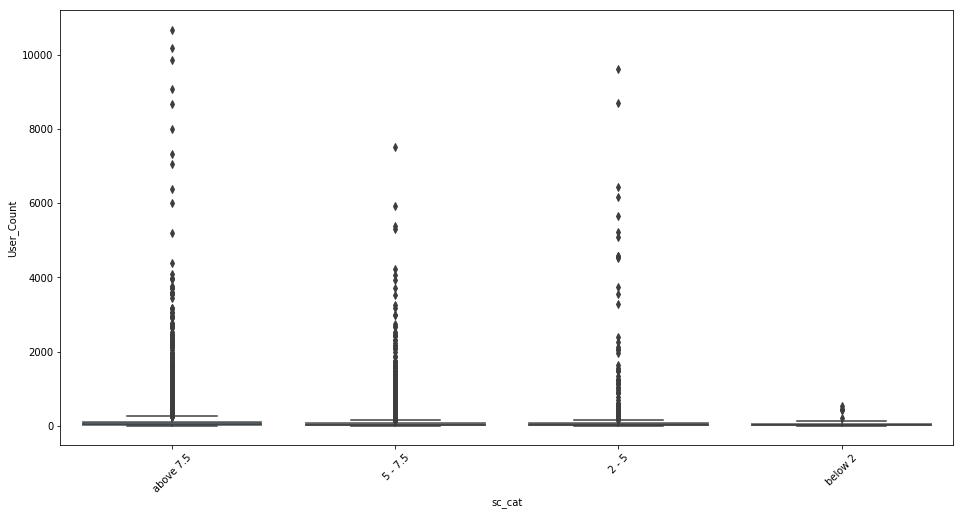

In [22]:
plt.figure(figsize = (16, 8))
ax = sns.boxplot(x='sc_cat', y='User_Count', data=data_obj)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

From the boxplot it is understood that ,User_Count depends mostly on the user rating. <br />
Games with ratings below 2 has very less User_Count. <br />
While Games with ratings above 7.5 has more number of users as outliers,But the IQR is almost same for all the score range .

As we decided the dependendent variable as User_Count ,plot qq plot to understand relationship between numerical columns.

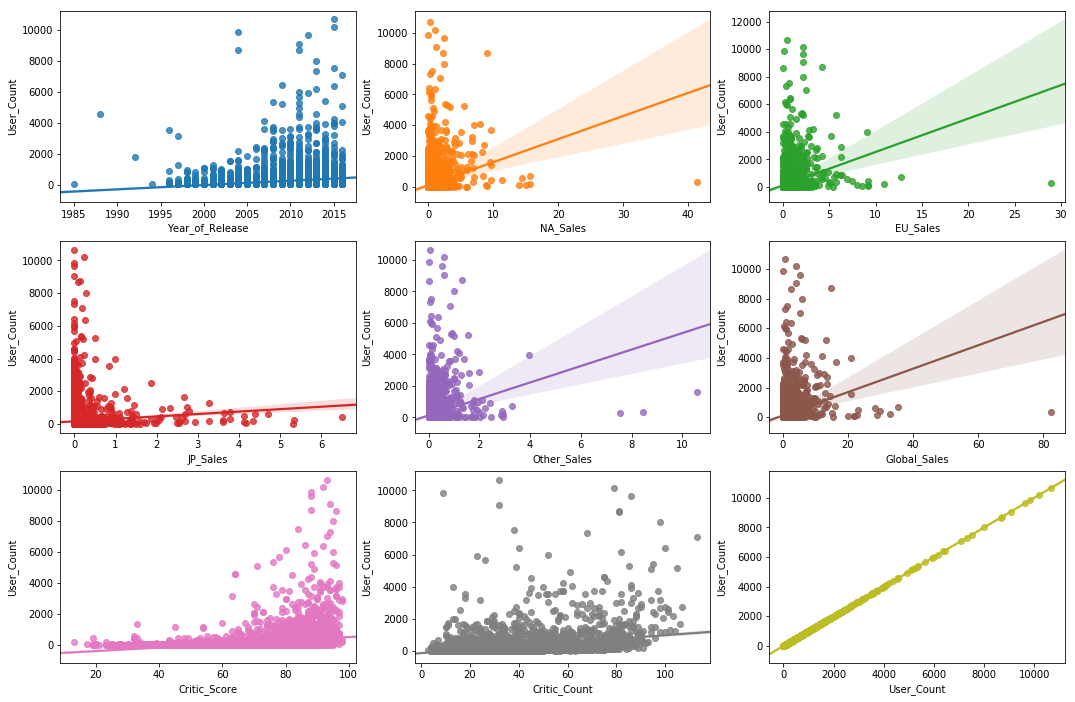

In [25]:
fig, ax = plt.subplots(round(len(num_col) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        sns.regplot(x=num_col[i],y='User_Count', data=data_num, ax=ax)
plt.show()

We can infer a patern that User_Count is increasing as year increases,the games released count is also increases abrubtly after 1995.<br / >
Also when try to fit critic score vs user count ,we can predict when critic score is less but deviates when critic score is high.<br />
Also critic count vs user count gives one of the best fit for most of data points but with some liitle deviations at all range.<br />
When we try to fix sales vs user_count it is not efficient.Atleast japanese sales has some relation,but most are outliers.

Normalize the numerical columns.

In [33]:
def normalize(x):
    try:
        x = x/np.linalg.norm(x,ord=1)
        x=x*100
        return x
    except :
        raise
data_nor = pd.DataFrame.apply(data_num,normalize)
print(data_nor)

       Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0             0.014642  1.536204  1.797295  0.860966     1.497510   
2             0.014656  0.582391  0.791902  0.865534     0.583054   
3             0.014663  0.579791  0.678330  0.749064     0.522799   
6             0.014642  0.418965  0.567240  1.484425     0.510394   
7             0.014642  0.518506  0.569723  0.669133     0.503305   
8             0.014663  0.536334  0.430705  1.073353     0.396973   
11            0.014634  0.360651  0.463598  0.943181     0.336718   
13            0.014649  0.331309  0.498352  0.822143     0.381023   
14            0.014671  0.557134  0.303480  0.054810     0.299502   
15            0.014663  0.334652  0.526900  0.577784     0.313680   
16            0.014693  0.260739  0.564137  0.223806     0.701792   
17            0.014627  0.350252  0.024825  0.093633     1.873217   
19            0.014634  0.176054  0.570964  0.950032     0.361529   
23            0.014693  0.358794  

Perform analysis using spyder plot .

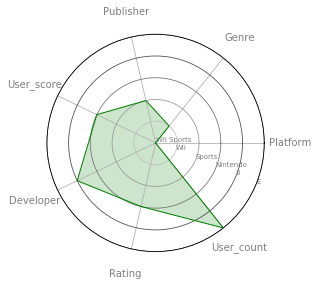

<module 'matplotlib.pyplot' from 'C:\\Users\\Sam Jones\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

# Function: radarchart, creates a radar-type visual from a dataframe of rankings across different attributes
# Inputs: (1) dataframe with 1 row. The first column is the name of the record, and subsequent columns are rankings for different criteria. Each criteria is a column header. (2) Maximum value to show on the r axis (3) Optional paramater that shades the shape green/yellow/red based on the ranking average ('avg') or max ranking for a single criteria 'max')
# Output: matplotlib image (polar chart) representing a radar chart

def radarchart(df,max,color_by='avg'):
  # source https://python-graph-gallery.com/390-basic-radar-chart/
  # First finding the number of variables "spokes" on the radar chart
  categories=[i.capitalize() for i in list(df)[1:]]
  N = len(categories)

  #determining the coloring of the final shape
  if (color_by=='avg'):
    color_val=(df.max(numeric_only=True)).mean()
  else:
    color_val=(df.max(numeric_only=True)).max()
  if (color_val>max*2/3):
    col='green'
  elif (color_val>max*1/3):
    col='yellow'
  else:
    col='red'

  values=df.loc[0].drop('User_Count').values.flatten().tolist()
  values += values[:1]

  # Determining the angle of each spoke
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  # Initialize the polar plot
  ax = plt.subplot(111, polar=True)
  # Draw one axe per variable + add labels
  plt.xticks(angles[:-1], categories, color='grey', size=10)
  ax.tick_params(axis='x', which='major', pad=15)

  # Draw r axis labels
  ax.set_rlabel_position(-22.5)
  plt.yticks(np.linspace(0,max,6), color="grey", size=7)
  plt.ylim(0,max)
  a = ax.get_ygridlines()
  inc=0.9/len(a)
  for i in range(len(a)):
    a[i].set_color((inc*(len(a)-i),inc*(len(a)-i),inc*(len(a)-i)))

  # Plot data
  ax.plot(angles, values, linewidth=1, linestyle='solid',color=col)

  # Fill area
  ax.fill(angles, values, col , alpha=0.2)
  plt.show()
  return plt

# Use Periscope to visualize a dataframe or an image by passing data to periscope.output()
radarchart(data_obj,5,color_by='avg')

Use radar plot for sales

['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'NA_Sales']
[0.23608937728936424, 0.06415824175824075, 0.08267692307691608, 0.777589743589759, 0.39448351648353513]


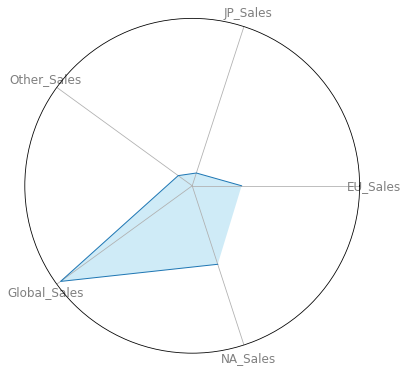

In [84]:
data_sal=data_num[['EU_Sales','JP_Sales','Other_Sales','Global_Sales','NA_Sales']]

categories = list(data_sal)
print(categories)
values = data_sal.mean().values.flatten().tolist()
#values += values[:1] # repeat the first value to close the circular graph
print(values)
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
#angles += angles[:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,8),
                       subplot_kw=dict(polar=True))
plt.xticks(angles, categories, color='grey', size=12)
plt.yticks(np.arange(0,0.8), ['', '.4', '.6', '.8', '5'],
           color='grey', size=12)
plt.ylim(0,.8)
ax.set_rlabel_position(30)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.show()

From the spider plot ,it is understood that NA sales has high value.<br />
Also Global sales is high because it is sum of other all sales.

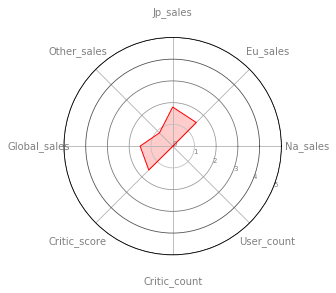

<module 'matplotlib.pyplot' from 'C:\\Users\\Sam Jones\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

# Function: radarchart, creates a radar-type visual from a dataframe of rankings across different attributes
# Inputs: (1) dataframe with 1 row. The first column is the name of the record, and subsequent columns are rankings for different criteria. Each criteria is a column header. (2) Maximum value to show on the r axis (3) Optional paramater that shades the shape green/yellow/red based on the ranking average ('avg') or max ranking for a single criteria 'max')
# Output: matplotlib image (polar chart) representing a radar chart

def radarchart(df,max,color_by='avg'):
  # source https://python-graph-gallery.com/390-basic-radar-chart/
  # First finding the number of variables "spokes" on the radar chart
  categories=[i.capitalize() for i in list(df)[1:]]
  N = len(categories)

  #determining the coloring of the final shape
  if (color_by=='avg'):
    color_val=(df.max(numeric_only=True)).mean()
  else:
    color_val=(df.max(numeric_only=True)).max()
  if (color_val>max*2/3):
    col='green'
  elif (color_val>max*1/3):
    col='yellow'
  else:
    col='red'

  values=df.loc[0].drop('User_Count').values.flatten().tolist()
  values += values[:1]

  # Determining the angle of each spoke
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  # Initialize the polar plot
  ax = plt.subplot(111, polar=True)
  # Draw one axe per variable + add labels
  plt.xticks(angles[:-1], categories, color='grey', size=10)
  ax.tick_params(axis='x', which='major', pad=15)

  # Draw r axis labels
  ax.set_rlabel_position(-22.5)
  plt.yticks(np.linspace(0,max,6), color="grey", size=7)
  plt.ylim(0,max)
  a = ax.get_ygridlines()
  inc=0.9/len(a)
  for i in range(len(a)):
    a[i].set_color((inc*(len(a)-i),inc*(len(a)-i),inc*(len(a)-i)))

  # Plot data
  ax.plot(angles, values, linewidth=1, linestyle='solid',color=col)

  # Fill area
  ax.fill(angles, values, col , alpha=0.2)
  plt.show()
  return plt

# Use Periscope to visualize a dataframe or an image by passing data to periscope.output()
radarchart(data_nor,5,color_by='avg')